<a href="https://colab.research.google.com/github/widyasitopu/prediction-linear-regression/blob/main/UG02_Assignment_Tugas_Akhir_4_Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
import operator
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import Markdown as md
from datetime import date, timedelta, datetime
from numpy import sqrt
from pandas import read_csv, to_datetime
from prettytable import PrettyTable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import datetime

In [3]:
df = pd.read_csv("/content/sample_data/prediksi.csv",";")

In [4]:
df.head()

,Tanggal,Positif,Hari_Ke
0,01/10/2021,1624,1
1,02/10/2021,1414,2
2,03/10/2021,1142,3
3,04/10/2021,922,4
4,05/10/2021,1404,5


In [5]:
df.shape

(52, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tanggal  52 non-null     object
 1   Positif  52 non-null     int64 
 2   Hari_Ke  52 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [7]:
df.describe()

,Positif,Hari_Ke
count,52.000000,52.000000
mean,742.980769,26.500000
std,359.710041,15.154757
min,221.000000,1.000000
25%,459.500000,13.750000
50%,627.000000,26.500000
75%,916.750000,39.250000
max,1624.000000,52.000000


In [8]:
last_date = to_datetime(df['Tanggal'].iloc[1], format='%d/%m/%Y')

In [9]:
df['Hari_Ke'] = df.Hari_Ke
df.columns = ['Tanggal','Positif','Hari_Ke']
df

,Tanggal,Positif,Hari_Ke
0,01/10/2021,1624,1
1,02/10/2021,1414,2
2,03/10/2021,1142,3
3,04/10/2021,922,4
4,05/10/2021,1404,5
5,06/10/2021,1484,6
6,07/10/2021,1393,7
7,08/10/2021,1384,8
8,09/10/2021,1167,9
9,10/10/2021,894,10


In [10]:
degree = 2

x = df['Hari_Ke'].values.reshape(df['Hari_Ke'].size,1)
y = df['Positif'].values.reshape(df['Positif'].size,1)
polynomial_features= PolynomialFeatures(degree=degree)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

In [11]:
def forecast_days_after(n_days_after):
    # mengembalikan prediksi model regresi polynomial
    model_pred = model.predict(polynomial_features.fit_transform([[n_days_after]]))
    return '{:d}'.format(int(round(model_pred[0][0])))

start_date = to_datetime(df['Tanggal'].iloc[0], format='%d/%m/%Y')
last_date = to_datetime(df['Tanggal'].iloc[-1], format='%d/%m/%Y')

def display_forecast_days_after(n_days_after):
    # mengembalikan prediksi model regresi polynomial
    end_date = start_date + timedelta(days=n_days_after)
    model_pred = model.predict(polynomial_features.fit_transform([[n_days_after]]))
    return end_date.strftime("%d %B %Y"), '{:d}'.format(int(round(model_pred[0][0])))

def days_passed_timedelta():
    # mengembalikan hasil objek timedelta
    # berapa hari telah lewat sejak tanggal awal (start_date)
    last_date = to_datetime(df['Tanggal'].iloc[-1], format='%d/%m/%Y')
    return last_date.date() - start_date.date() 
def date_days_after(n_days_after, date_format="%d %B %Y", **kwargs):
    tanggal = start_date + timedelta(days=n_days_after)
    return tanggal.date().strftime(date_format)
def display_tabel_prediksi(days_after):
    # tabel prediksi
    days_passed = days_passed_timedelta().days
    tabel_prediksi = PrettyTable(['ke-', 'Tanggal','Positif'])
    for x in range(days_passed+1,days_after+1):
        tabel_prediksi.add_row([x, date_days_after(x, date_format="%d-%m-%Y"), forecast_days_after(x)])
    print(tabel_prediksi)
    
def display_tabel_realisasi(lookback):
    # tabel prediksi
    days_passed = days_passed_timedelta().days
    tabel_realisasi = PrettyTable(['Tanggal','Positif', 'real', 'p-r'])
    for x in range(days_passed, days_passed-lookback+1, -1):
        pred_ = int(forecast_days_after(x))
        real_ = y[x][0]
        eval_ = pred_ - real_    
        tabel_realisasi.add_row([date_days_after(x, date_format="%d-%m-%Y"), pred_, real_, eval_])
    print(tabel_realisasi)
def display_equation(model):
    for coef in model.coef_:
        pass
    streq = "$y = " +str(model.intercept_[0])
    for i,c in enumerate(coef):
        j = len(coef)-i-1
        if abs(c) > c:
            sign = "-"
        else:
            sign = "+"
        if i > 1:
            streq += sign +str(abs(c)) + " \cdot x^{"+str(i)+"}"
        elif i == 1:
            streq += sign +str(abs(c)) + " \cdot x"

    streq =   streq + "$"
    return md(streq)
def display_widget_forecast_days_after():
    print('data terakhir adalah data hari ke-' + str(days_passed_timedelta().days) + \
          ', untuk mendapatkan prediksi ke depan geser slider ke kanan (gunakan tombol panah kanan -> pada keyboard):')
    @interact(x=(days_passed_timedelta().days+1, 365,1))
    def h(x=days_passed_timedelta().days+1):
        tabel_prediksi = PrettyTable(['hari ke-x', 'tanggal','prediksi akumulasi'])
        tabel_prediksi.add_row([x, date_days_after(x), forecast_days_after(x)])
        print(tabel_prediksi)

In [12]:
# tabel parameter
tabel_parameter = PrettyTable(['parameter', 'nilai'])
tabel_parameter.add_row(['polynomial\ndegree', degree])
tabel_parameter.add_row(['RMSE','{:.10}'.format(rmse)])
tabel_parameter.add_row(['R^2', '{:.10}'.format(r2)])

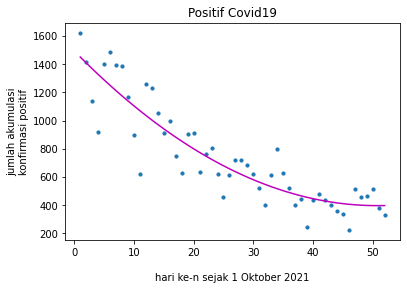

+------------+--------------+
| parameter  |    nilai     |
+------------+--------------+
| polynomial |      2       |
|   degree   |              |
|    RMSE    | 152.8610138  |
|    R^2     | 0.8158712871 |
+------------+--------------+


$y = 1493.49615384616-43.20610480283088 \cdot x+0.42527912955215896 \cdot x^{2}$

In [13]:
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.title('Positif Covid19')
plt.xlabel('\nhari ke-n sejak 1 Oktober 2021')
plt.ylabel('jumlah akumulasi\nkonfirmasi positif')

plt.plot(x, y_poly_pred, color='m')
plt.show()
print(tabel_parameter)
display_equation(model)

In [14]:
display_tabel_prediksi(91)

+-----+------------+---------+
| ke- |  Tanggal   | Positif |
+-----+------------+---------+
|  52 | 22-11-2021 |   397   |
|  53 | 23-11-2021 |   398   |
|  54 | 24-11-2021 |   400   |
|  55 | 25-11-2021 |   404   |
|  56 | 26-11-2021 |   408   |
|  57 | 27-11-2021 |   412   |
|  58 | 28-11-2021 |   418   |
|  59 | 29-11-2021 |   425   |
|  60 | 30-11-2021 |   432   |
|  61 | 01-12-2021 |   440   |
|  62 | 02-12-2021 |   449   |
|  63 | 03-12-2021 |   459   |
|  64 | 04-12-2021 |   470   |
|  65 | 05-12-2021 |   482   |
|  66 | 06-12-2021 |   494   |
|  67 | 07-12-2021 |   508   |
|  68 | 08-12-2021 |   522   |
|  69 | 09-12-2021 |   537   |
|  70 | 10-12-2021 |   553   |
|  71 | 11-12-2021 |   570   |
|  72 | 12-12-2021 |   587   |
|  73 | 13-12-2021 |   606   |
|  74 | 14-12-2021 |   625   |
|  75 | 15-12-2021 |   645   |
|  76 | 16-12-2021 |   666   |
|  77 | 17-12-2021 |   688   |
|  78 | 18-12-2021 |   711   |
|  79 | 19-12-2021 |   734   |
|  80 | 20-12-2021 |   759   |
|  81 | 